#### Preliminaries

First we import the libraries we will need, and the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
from matplotlib.patches import Rectangle

import matplotlib as mpl
#my_params = mpl.rcParams

%matplotlib inline

#### A NOTE ON STATISTICAL TERMINOLOGY

Some familiarity with statistics, in particular with hypothesis testing, would be beneficial, but I have included a  list of essential **definitions at the end of the notebook**.

In [3]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')

#### Confidence interval for the correlation coefficient

given the confidence level of 95%, the number of wells (and from that the degrees of freedom), and the sample correlation coefficient, we can calculate the confidence interval for the population correlation coefficient (P97.5 and P2.5).

Here's a convenient function to calculate it; for the details of the calculation, see <a href = "http://brownmath.com/stat/correl.htm#CI"> Brown</a>.

In [3]:
def confInt(r, nwells):
    z_crit = sp.stats.norm.ppf(.975)
    std_Z = 1/np.sqrt(nwells-3)
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1)
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

With 21 wells:

In [4]:
np.set_printoptions(precision=2)
cm21 = np.asarray([confInt(r, 21) for r in (np.arange(0.00,1.05,0.05))]).T
print (cm21)

[[ 0.43  0.47  0.51  0.55  0.58  0.62  0.65  0.68  0.71  0.74  0.77  0.79
   0.82  0.84  0.87  0.89  0.92  0.94  0.96  0.98  1.  ]
 [-0.43 -0.39 -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.04  0.02  0.09  0.16
   0.23  0.3   0.38  0.47  0.56  0.66  0.77  0.88  1.  ]]


In [5]:
crr = np.arange(0.0,1.05,0.05).round(decimals=2)

CI21 = pd.DataFrame(cm21, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

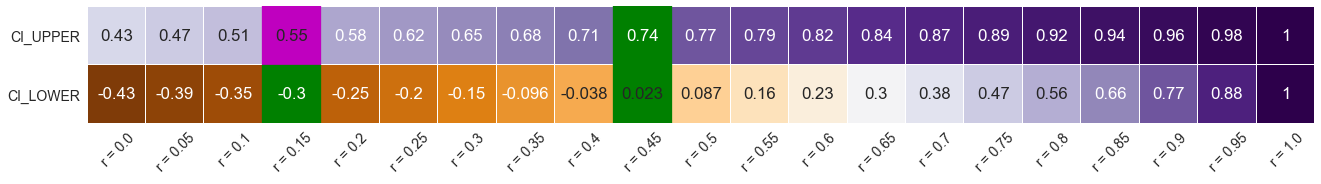

In [6]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI21, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((3,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((3,1), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,0), 1, 1, fill=True, color = 'green')) 
h.add_patch(Rectangle((9,1), 1, 1, fill=True, color = 'green')) 
plt.show()

This tells us a bit more than just the critical r test. 

Discuss as in **Chambers and Yarus (2002, Reference 4)**

We see again that it takes at least a correlation coefficient of 0.45 (greater than the critical r = 0.43) 
but also.....

Interesting to see what happens with only 5 wells:

In [7]:
cm5 = np.asarray([confInt(r, 5) for r in (np.arange(0.00,1.05,0.05))]).T

In [8]:
print (cm5)

[[ 0.88  0.89  0.9   0.91  0.92  0.93  0.93  0.94  0.95  0.95  0.96  0.96
   0.97  0.97  0.98  0.98  0.99  0.99  0.99  1.    1.  ]
 [-0.88 -0.87 -0.86 -0.84 -0.83 -0.81 -0.79 -0.77 -0.75 -0.72 -0.68 -0.65
  -0.6  -0.54 -0.48 -0.39 -0.28 -0.13  0.09  0.42  1.  ]]


In [9]:
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

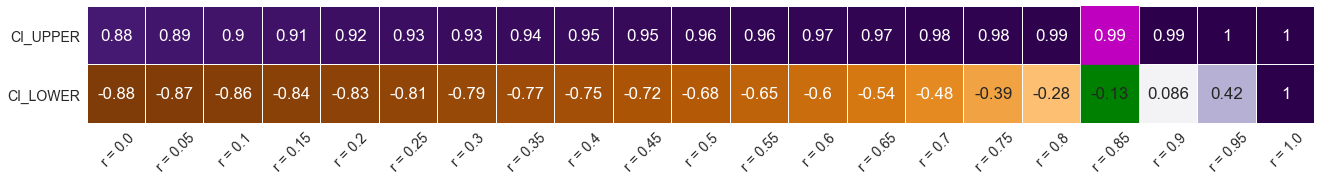

In [10]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(22,4))
h = sns.heatmap(CI5, annot=True, cmap='PuOr', square=True, linewidths=0.01, cbar=False)
plt.xticks(rotation=45)
h.add_patch(Rectangle((17,0), 1, 1, fill=True, color = 'm')) 
h.add_patch(Rectangle((17,1), 1, 1, fill=True, color = 'green')) 
plt.show()

With only 5 wells even Gross pay technically does not pass the test

In [11]:
cm5 = np.asarray([confInt(r, 5) for r in (np.arange(0.00,1.05,0.05))]).T
CI5 = pd.DataFrame(cm5, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm10 = np.asarray([confInt(r, 10) for r in (np.arange(0.00,1.05,0.05))]).T
CI10 = pd.DataFrame(cm10, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm15 = np.asarray([confInt(r, 15) for r in (np.arange(0.00,1.05,0.05))]).T
CI15 = pd.DataFrame(cm15, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm20 = np.asarray([confInt(r, 20) for r in (np.arange(0.00,1.05,0.05))]).T
CI20 = pd.DataFrame(cm20, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm25 = np.asarray([confInt(r, 25) for r in (np.arange(0.00,1.05,0.05))]).T
CI25 = pd.DataFrame(cm25, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])
cm30 = np.asarray([confInt(r, 30) for r in (np.arange(0.00,1.05,0.05))]).T
CI30 = pd.DataFrame(cm30, index = ['CI_UPPER', 'CI_LOWER'], 
                  columns = [" r = " + mp for mp in map(str, crr)])

### This is a broadcasting test

In [12]:
rp = np.arange(0.00,1.05,0.05)
prova = confInt(rp, 5)
print (prova)
print (cm5)

(array([0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.93, 0.94, 0.95, 0.95, 0.96,
       0.96, 0.97, 0.97, 0.98, 0.98, 0.99, 0.99, 0.99, 1.  , 1.  ]), array([-0.88, -0.87, -0.86, -0.84, -0.83, -0.81, -0.79, -0.77, -0.75,
       -0.72, -0.68, -0.65, -0.6 , -0.54, -0.48, -0.39, -0.28, -0.13,
        0.09,  0.42,  1.  ]))
[[ 0.88  0.89  0.9   0.91  0.92  0.93  0.93  0.94  0.95  0.95  0.96  0.96
   0.97  0.97  0.98  0.98  0.99  0.99  0.99  1.    1.  ]
 [-0.88 -0.87 -0.86 -0.84 -0.83 -0.81 -0.79 -0.77 -0.75 -0.72 -0.68 -0.65
  -0.6  -0.54 -0.48 -0.39 -0.28 -0.13  0.09  0.42  1.  ]]


### Success!! the function can take directly arrays as parameters

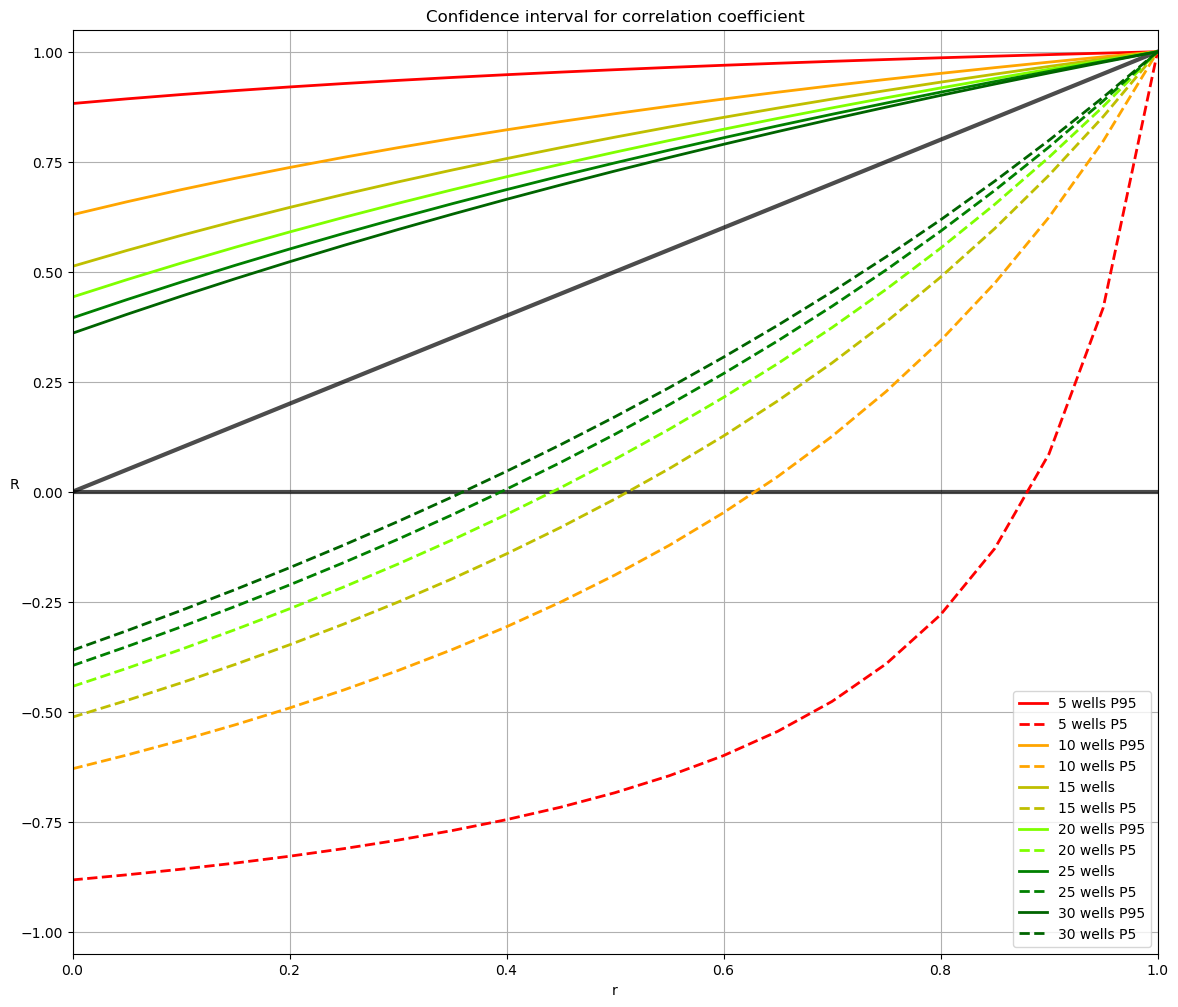

In [13]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(14,12))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm10[0,:],  'Orange', linewidth= 2, label = '10 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm10[1,:], '--', color = 'Orange', linewidth= 2, label = '10 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm15[0,:],  'y', linewidth= 2, label = '15 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm15[1,:], 'y--', linewidth= 2, label = '15 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm20[0,:], 'chartreuse', linewidth= 2, label = '20 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm20[1,:], '--', color = 'chartreuse', linewidth= 2, label = '20 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm25[0,:],  'g', linewidth= 2, label = '25 wells')
ax.plot(np.arange(0.00,1.05,0.05), cm25[1,:], 'g--', linewidth= 2, label = '25 wells P5')
ax.plot(np.arange(0.00,1.05,0.05), cm30[0,:],  'darkgreen', linewidth= 2, label = '30 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm30[1,:], '--', color = 'darkgreen', linewidth= 2, label = '30 wells P5')
plt.legend()
plt.grid();



### This is a test to plot the confidence interval with 5 wells and also mark the interval at a specific r

In [14]:
cm5_test_r06 = confInt(0.6, 5)
cm5_test_r06

(0.9692070969784793, -0.5997499978988459)

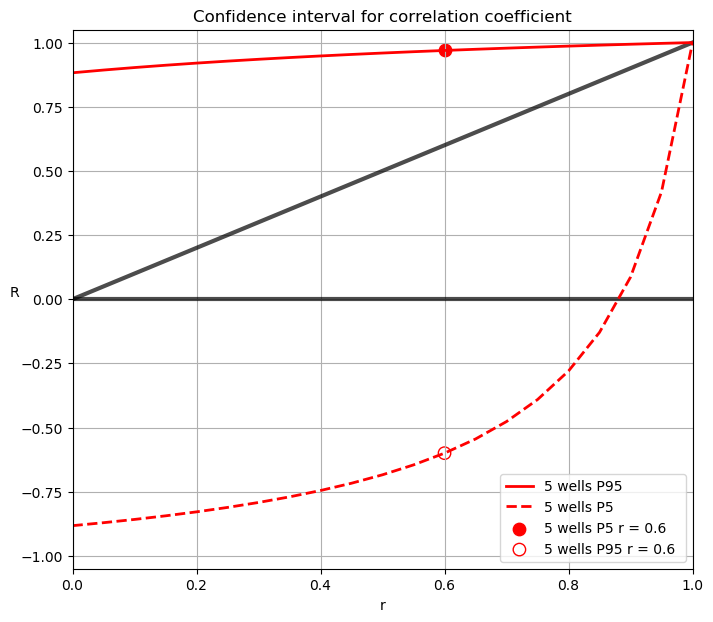

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(8,7))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.scatter (0.6, cm5_test_r06[0], s=80, facecolors = 'r', edgecolors='r', label = '5 wells P5 r = 0.6 ')
ax.scatter (0.6, cm5_test_r06[1], s=80, facecolors = 'none', edgecolors='r', label = '5 wells P95 r = 0.6 ')
plt.legend()
plt.grid();



### This is a test to plot the zero intercept with 5 wells

In [16]:
def interpolated_intercept(x, y1, y2):
    """Find the intercept of two curves, given by the same x data"""

    def intercept(point1, point2, point3, point4):
        """find the intersection between two lines
        the first line is defined by the line between point1 and point2
        the first line is defined by the line between point3 and point4
        each point is an (x,y) tuple.

        So, for example, you can find the intersection between
        intercept((0,0), (1,1), (0,1), (1,0)) = (0.5, 0.5)

        Returns: the intercept, in (x,y) format
        """    

        def line(p1, p2):
            A = (p1[1] - p2[1])
            B = (p2[0] - p1[0])
            C = (p1[0]*p2[1] - p2[0]*p1[1])
            return A, B, -C

        def intersection(L1, L2):
            D  = L1[0] * L2[1] - L1[1] * L2[0]
            Dx = L1[2] * L2[1] - L1[1] * L2[2]
            Dy = L1[0] * L2[2] - L1[2] * L2[0]

            x = Dx / D
            y = Dy / D
            return x,y

        L1 = line([point1[0],point1[1]], [point2[0],point2[1]])
        L2 = line([point3[0],point3[1]], [point4[0],point4[1]])

        R = intersection(L1, L2)

        return R

    idx = np.argwhere(np.diff(np.sign(y1 - y2)) != 0)
    xc, yc = intercept((x[idx], y1[idx]),((x[idx+1], y1[idx+1])), ((x[idx], y2[idx])), ((x[idx+1], y2[idx+1])))
    return xc,yc

In [17]:
x  = np.arange(0.00,1.05,0.05)
y1 = 0. * x
y2 = cm5[1,:]

xc, yc = interpolated_intercept(x,y1,y2)
print (xc)
print (yc)

[[0.88]]
[[-0.]]


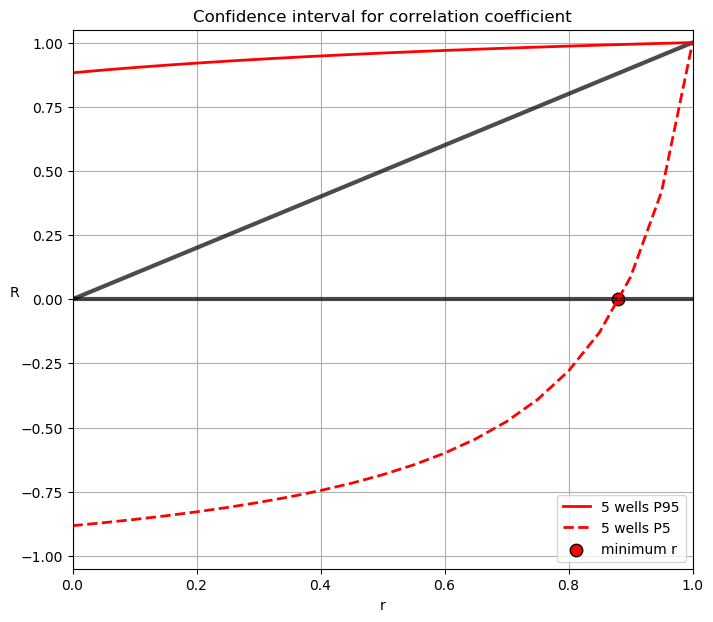

In [18]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(8,7))

plt.title('Confidence interval for correlation coefficient')

ax.set_ylim([-1.05,1.05])
ax.set_xlim([0, 1])
ax.set_ylabel('R', rotation = 0)
ax.set_xlabel('r', rotation = 0)

ax.plot( [0,1], [0, 1], 'k', linewidth= 3, alpha = 0.7)
ax.plot( [0,1], [0, 0], 'k', linewidth= 3, alpha = 0.7)
ax.plot(np.arange(0.00,1.05,0.05), cm5[0,:],  'r', linewidth= 2, label = '5 wells P95')
ax.plot(np.arange(0.00,1.05,0.05), cm5[1,:], 'r--', linewidth= 2, label = '5 wells P5')
ax.scatter (xc, yc, s=80, facecolors = 'r', edgecolors='k', label = 'minimum r')

plt.legend()
plt.grid();



### Test of using the function to calculate minimum number of wells to get confidence interval of a specific width

In [19]:
def confInt(r, nwells):
    z_crit = sp.stats.norm.ppf(.9) # notice change of confidence level
    std_Z = 1/np.sqrt(nwells-3)
    E = z_crit*std_Z
    Z_star = 0.5*(np.log((1+r)/(1.0000000000001-r)))
    ZCI_l = Z_star - E
    ZCI_u = Z_star + E
    RCI_l = (np.exp(2*ZCI_l)-1)/(np.exp(2*ZCI_l)+1)
    RCI_u = (np.exp(2*ZCI_u)-1)/(np.exp(2*ZCI_u)+1)
    return RCI_u, RCI_l

In [20]:
np.set_printoptions(precision=2)
w = np.arange(6, 150, 1)
cm_r06= confInt(0.6, w) 
print (cm_r06)

(array([0.89, 0.87, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.79, 0.78,
       0.78, 0.77, 0.77, 0.76, 0.76, 0.76, 0.75, 0.75, 0.75, 0.74, 0.74,
       0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72,
       0.72, 0.72, 0.72, 0.72, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71, 0.71,
       0.71, 0.71, 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.7 ,
       0.7 , 0.7 , 0.7 , 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69,
       0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.69, 0.68, 0.68,
       0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68,
       0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68, 0.68,
       0.68, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67, 0.67,
       0.67, 0.67, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.66, 0.66, 0.66,
       0.66]), array([-0.05,  0.05,  0.12,  0.17, 

In [21]:
cm_r06[0]-cm_r06[1]

array([0.94, 0.82, 0.73, 0.67, 0.62, 0.58, 0.55, 0.52, 0.5 , 0.47, 0.46,
       0.44, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.34,
       0.33, 0.32, 0.32, 0.31, 0.3 , 0.3 , 0.29, 0.29, 0.29, 0.28, 0.28,
       0.27, 0.27, 0.27, 0.26, 0.26, 0.26, 0.25, 0.25, 0.25, 0.24, 0.24,
       0.24, 0.24, 0.23, 0.23, 0.23, 0.23, 0.23, 0.22, 0.22, 0.22, 0.22,
       0.22, 0.21, 0.21, 0.21, 0.21, 0.21, 0.21, 0.2 , 0.2 , 0.2 , 0.2 ,
       0.2 , 0.2 , 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.18,
       0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17,
       0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14,
       0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14,
       0.14])

In [22]:
idx = np.argmax((cm_r06[0]-cm_r06[1])<=0.2)
cmin = w[idx]
print (idx, cmin)

65 71
